<a href="https://colab.research.google.com/github/pjablonski123/alk_eye-tech/blob/master/eva_alk_p1-v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.inception_v3 import InceptionV3 
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Model 
from keras.models import Sequential
from keras import optimizers 
from keras import layers
from keras import models
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.models import load_model

In [83]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [0]:
# pre-trained Inception V3 model 
base_model = InceptionV3(weights='imagenet', include_top=False) 
base_model.trainable = False

model = models.Sequential()
model.add(base_model)

model.add(GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu')) 
model.add(Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

adam = optimizers.adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 21,934,050
Trainable params: 131,266
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_dir = '/content/drive/My Drive/TEST1/' 
test_dir = '/content/drive/My Drive/TEST2/'

In [87]:
train_generator = train_datagen.flow_from_directory( train_dir,
  target_size=(299, 299), batch_size=10, class_mode='categorical')

test_generator = test_datagen.flow_from_directory( test_dir,
  target_size=(299, 299), batch_size=10, class_mode='categorical')

Found 717 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [0]:
# Setup a callback to save the best model 
callbacks = [keras.callbacks.ModelCheckpoint(
  'model.{epoch:02d}-{val_accuracy:.2f}.hdf5', 
  monitor='val_accuracy', verbose=1, save_best_only=True, 
  mode='max', period=1)]

In [89]:
history = model.fit_generator(train_generator, verbose=1, 
  steps_per_epoch=len(train_generator), epochs=20,
  validation_data=test_generator,
  validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/20
72/72 [==============================] - 13s 181ms/step - loss: 0.6128 - accuracy: 0.7127 - val_loss: 0.8682 - val_accuracy: 0.1071

Epoch 00001: val_accuracy improved from -inf to 0.10714, saving model to model.01-0.11.hdf5
Epoch 2/20
72/72 [==============================] - 9s 118ms/step - loss: 0.4663 - accuracy: 0.7908 - val_loss: 0.7351 - val_accuracy: 0.1888

Epoch 00002: val_accuracy improved from 0.10714 to 0.18878, saving model to model.02-0.19.hdf5
Epoch 3/20
72/72 [==============================] - 9s 118ms/step - loss: 0.3731 - accuracy: 0.8438 - val_loss: 0.5283 - val_accuracy: 0.8827

Epoch 00003: val_accuracy improved from 0.18878 to 0.88265, saving model to model.03-0.88.hdf5
Epoch 4/20
72/72 [==============================] - 8s 118ms/step - loss: 0.3129 - accuracy: 0.8759 - val_loss: 0.7604 - val_accuracy: 0.7500

Epoch 00004: val_accuracy did not improve from 0.88265
Epoch 5/20
72/72 [==============================] - 9s 119ms/step - loss: 0.2917 - accurac

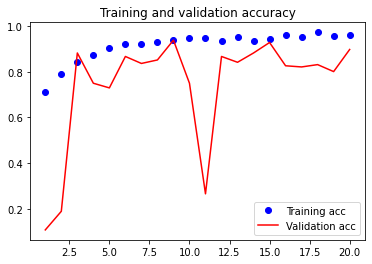

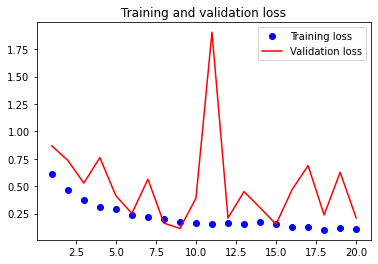

In [90]:
def plot_history(history): 
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy'] 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    epochs = range(1, len(acc) + 1) 
    
    plt.figure() 
    plt.title('Training and validation accuracy') 
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='red', \
      label='Validation acc') 
    plt.legend() 
    plt.show() 
   
    plt.figure() 
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', \
      label='Validation loss') 
    plt.legend() 
    plt.show() 
    return acc, val_acc, loss, val_loss 

acc, val_acc, loss, val_loss = plot_history(history)

In [67]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [0]:
model.load_weights("model.09-0.94.hdf5")

#model = load_model('model.09-0.94.hdf5')

In [0]:
classes = ['CNV', 'NORMAL']

def preprocess_input(x):
    x = img_to_array(x) / 255.
    return np.expand_dims(x, axis=0) 

# Prediction for an image path in the local directory
def predict_from_image_path(image_path):
    return predict_image(load_img(image_path, target_size=(299, 299)))

# Prediction for an image URL path
def predict_from_image_url(image_url):
    res = requests.get(image_url)
    im = Image.open(BytesIO(res.content))
    return predict_from_image_path(im.fp)
    
# Predict an image
def predict_image(im):
    x = preprocess_input(im)
    pred = np.argmax(model.predict(x))
    return pred, classes[pred]

In [93]:
#Picture with CNV
print(predict_from_image_path('/content/drive/My Drive/TEST2/test2c.jpeg'))

(0, 'CNV')


In [94]:
#Picture without an eye disease
print(predict_from_image_path('/content/drive/My Drive/TEST2/test2n.jpeg'))

(1, 'NORMAL')


In [95]:
#CNV again
print(predict_from_image_path('/content/drive/My Drive/TEST2/no-disease-cnv-28682-8.jpeg'))

(0, 'CNV')


In [96]:
#NORMAL
print(predict_from_image_path('/content/drive/My Drive/TEST2/test1n.jpeg'))

(1, 'NORMAL')
